In [1]:
from anyBSM import anyH3
import anyBSM.plotting as plotting
plotting.anyLogo = {'resize': 1.5, 'show': True, 'alpha': 0.4, 'zorder': 0, 'loc': 'lower right'}
#plotting.anyLogo['resize']=80
import numpy as np
import subprocess as sp
import matplotlib
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
MSSM = anyH3('MSSM',  
             scheme_name='OS', 
             quiet=True,
             ask=False,
             caching=2)

In [3]:
### change the path to the SPheno executable here ###
SPhenoBin='/home/braathen/Documents/SPheno/SPheno-4.0.4/bin/SPhenoMSSM'

# Varying m0

In [4]:
tablam_wmh2L=[]
MSSM.setparameters('MSSMfiles/SLHA.spc')
lam=MSSM.lambdahhh()
tablam_wmh2L.append(list(lam.values()))

In [5]:
# run with m_h computed at 2L
nval=20
tbin=10
m0in=np.logspace(start=np.log10(500),stop=np.log10(50000),num=nval)
tabmh0L=[]
tablam_wmh0L=[]
tabmh2L=[]
tablam_wmh2L=[]
tabv_wmh2L=[]
tabv_wmh0L=[]

# run with m_h computed at 2L
for i in range(nval):
    gen_in=open("MSSMfiles/GenLesHouches.in.MSSM","r")
    write_in=open("MSSMfiles/SLHA.in","w")
	
    for line in gen_in:
        write_in.write(line.replace('TANBETAIN','%f' %(tbin)).replace('AZEROIN','%f' %(-m0in[i])).replace('M0IN','%f' %(m0in[i])).replace('M12IN','%f' %(m0in[i])).replace('NOTWOLOOP','%f' %(0)).replace('ONELOOP','%f' %(1)))
		
    gen_in.close()
    write_in.close()

    dump=open("dump.txt","w")

    sp.run([SPhenoBin,"MSSMfiles/SLHA.in", "MSSMfiles/SLHA.spc"],stdout=dump)

    out_file=open("MSSMfiles/SLHA.spc","r")

    for line in out_file:
        if ('DECAY' not in line and 'BR' not in line):
            if 'hh_1' in line:
                mh1=float(line.replace(' 25',' ').replace('# hh_1',' '))
        if ('version' not in line and 'vd' not in line and 'vu' not in line and 'values' not in line):
            if '# v' in line:
                vev=float(line.replace(' 3',' ').replace('# v',' '))

    tabmh2L.append(mh1)
    tabv_wmh2L.append(vev)

    MSSM.setparameters('MSSMfiles/SLHA.spc')

    lam=MSSM.lambdahhh()
    tablam_wmh2L.append(list(lam.values()))

In [5]:
# run with m_h computed at 1L
nval=20
tabmh1L=[]
tablam_wmh1L=[]
tabv_wmh1L=[]
for i in range(nval):
    gen_in=open("MSSMfiles/GenLesHouches.in.MSSM","r")
    write_in=open("MSSMfiles/SLHA.in","w")
	
    for line in gen_in:
        write_in.write(line.replace('TANBETAIN','%f' %(tbin)).replace('AZEROIN','%f' %(-m0in[i])).replace('M0IN','%f' %(m0in[i])).replace('M12IN','%f' %(m0in[i])).replace('NOTWOLOOP','%f' %(1)).replace('ONELOOP','%f' %(1)))
		
    gen_in.close()
    write_in.close()

    dump=open("dump.txt","w")

    sp.run([SPhenoBin,"MSSMfiles/SLHA.in", "MSSMfiles/SLHA1L.spc"],stdout=dump)

    out_file=open("MSSMfiles/SLHA1L.spc","r")

    for line in out_file:
        if ('DECAY' not in line and 'BR' not in line):
            if 'hh_1' in line:
                mh1=float(line.replace(' 25',' ').replace('# hh_1',' '))
        if ('version' not in line and 'vd' not in line and 'vu' not in line and 'values' not in line):
            if '# v' in line:
                vev=float(line.replace(' 3',' ').replace('# v',' '))

    tabmh1L.append(mh1)
    tabv_wmh1L.append(vev)

    MSSM.setparameters('MSSMfiles/SLHA1L.spc')

    lam=MSSM.lambdahhh()
    tablam_wmh1L.append(list(lam.values()))

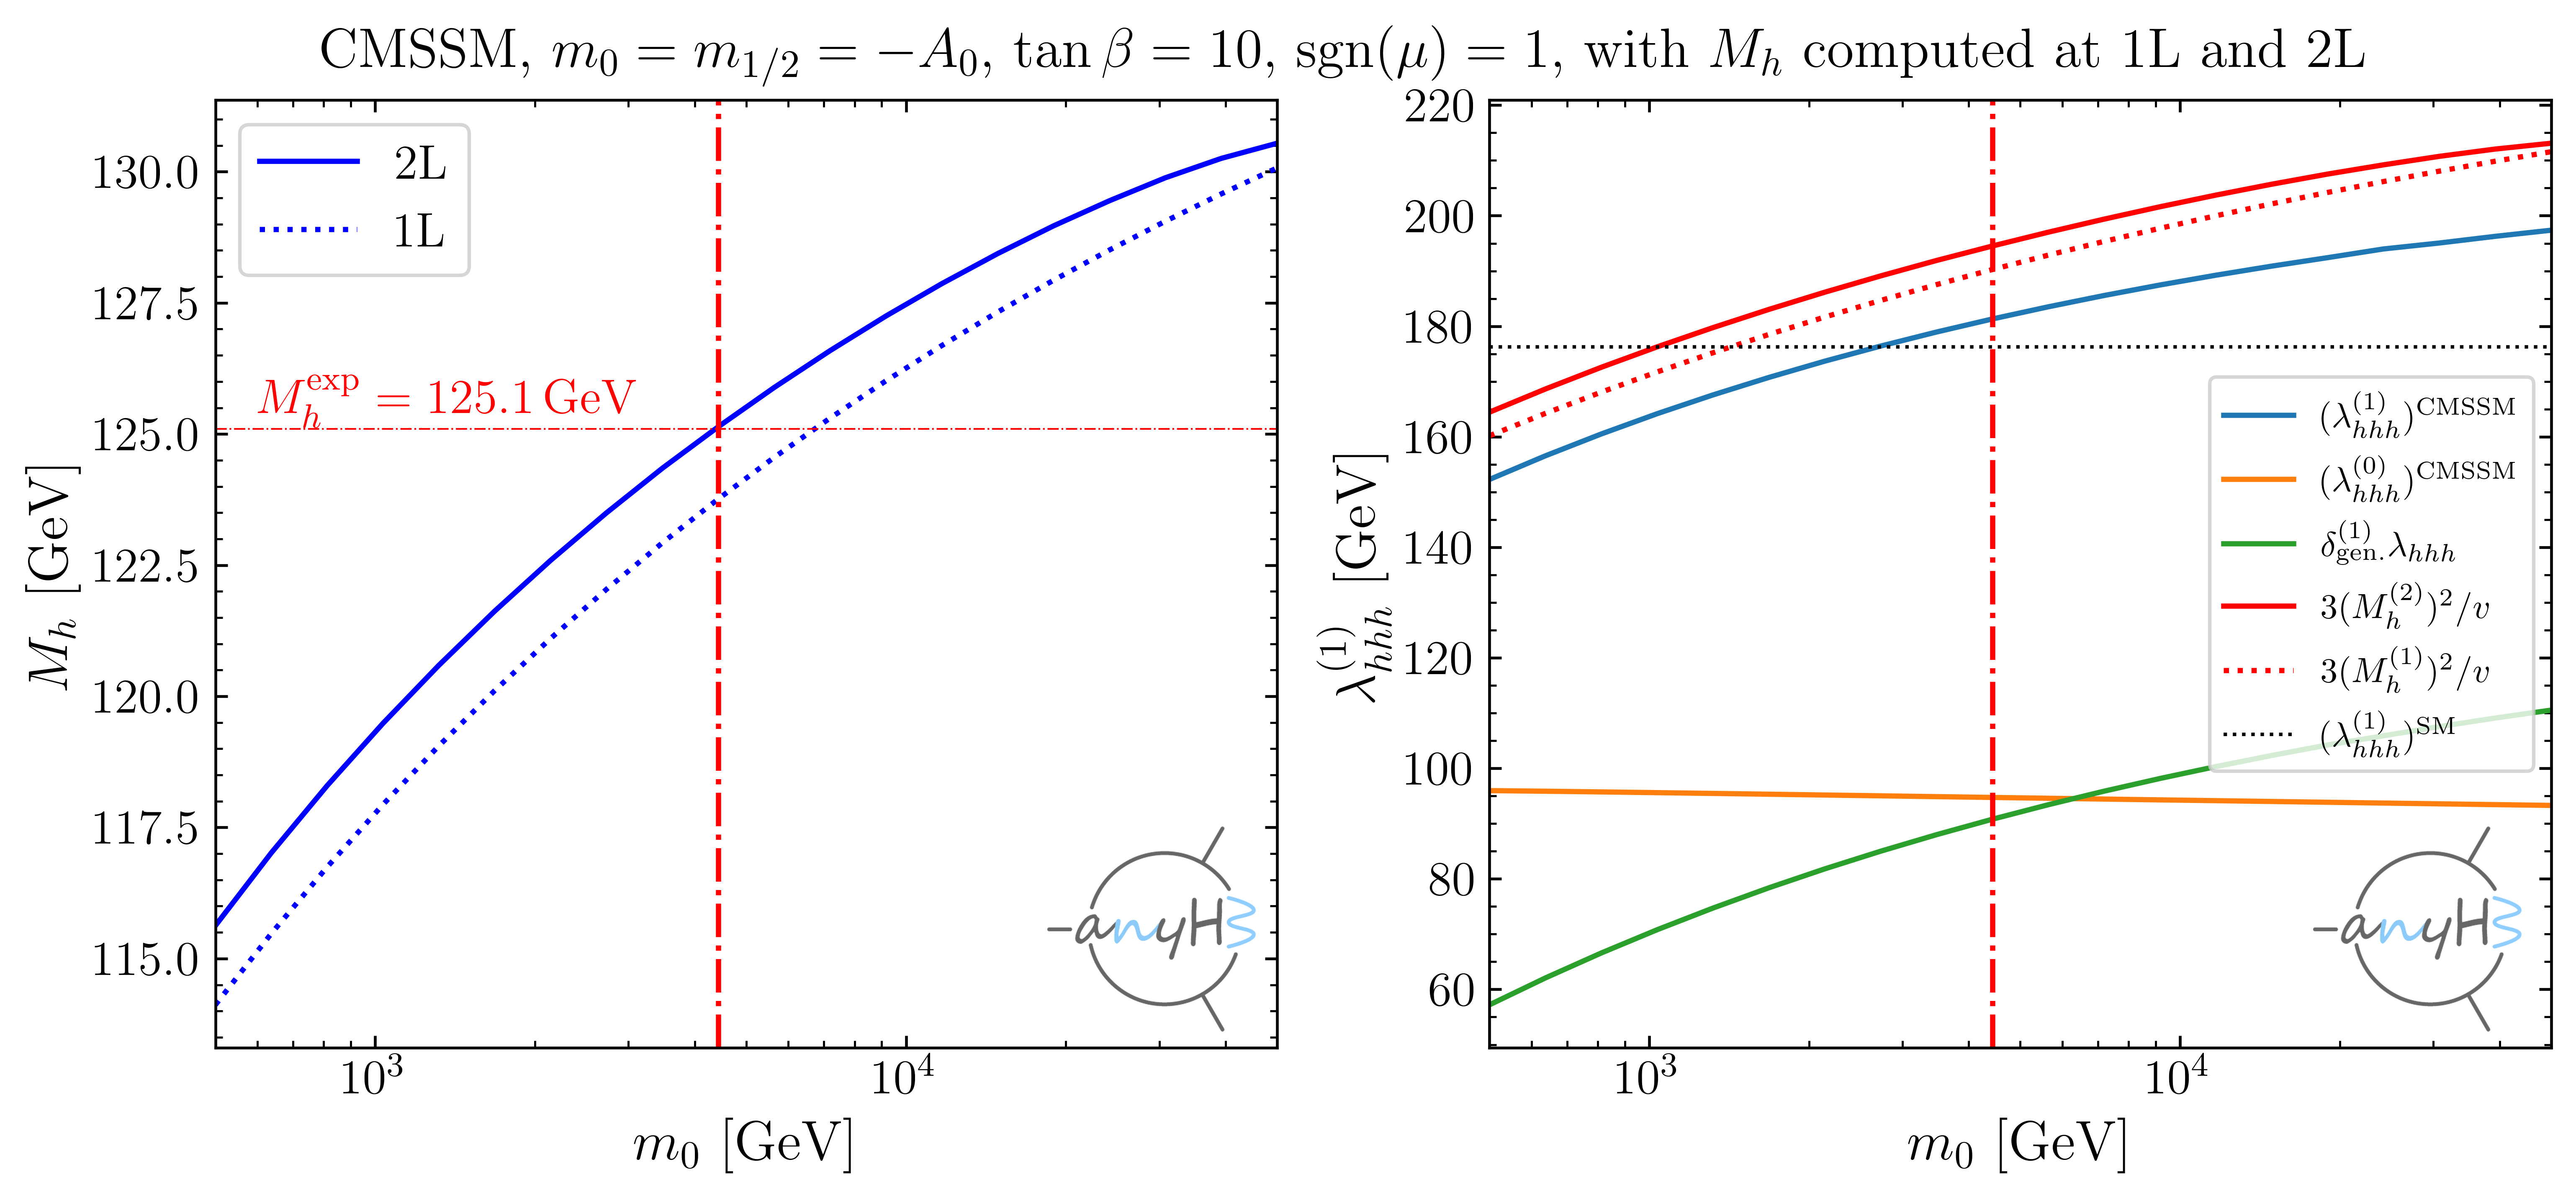

In [8]:
matplotlib.rcParams['font.size'] = 14.0
plotting.anyLogo['show']=False
tablam_approx_wmh2L=[3*tabmh2L[i]**2/(tabv_wmh2L[i]) for i in range(len(tabmh2L))]
tablam_approx_wmh1L=[3*tabmh1L[i]**2/(tabv_wmh1L[i]) for i in range(len(tabmh1L))]
lamlabels = {0: r'$(\lambda_{hhh}^{(1)})^{\rm{CMSSM}}$', 1: r'$(\lambda_{hhh}^{(0)})^{\rm{CMSSM}}$', 2: r'$\delta^{(1)}_{\rm{gen.}}\lambda_{hhh}$'}
fig, ax = plt.subplots(1,2,sharex=False,sharey=False,figsize=(12,5))
fig.dpi=600
ax[0].plot(m0in,tabmh2L,label=r"2L",c='blue')
ax[0].plot(m0in,tabmh1L,label=r"1L",ls=":",c='blue')
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$m_0$ [GeV]',fontsize=16)
ax[0].set_ylabel(r'$M_h$ [GeV]',fontsize=16)
ax[0].axvline(x=4430,c='r',ls='-.')
ax[0].axhline(y=125.1,c='r',ls='-.',lw=0.5)
ax[0].text(600,125.4, r'$M_h^{\rm{exp}}=125.1\,\rm{GeV}$', c='r')
ax[0].set_xlim(500,50000)
ax[0].legend(loc='upper left')
for i in range(3):
    ax[1].plot(m0in,np.array(list(tablam_wmh2L)).transpose()[i].real,label=lamlabels[i])
ax[1].plot(m0in,tablam_approx_wmh2L,label=r'$3(M_h^{(2)})^2/v$',color='red')
ax[1].plot(m0in,tablam_approx_wmh1L,label=r'$3(M_h^{(1)})^2/v$',color='red',ls=":")
ax[1].axhline(y=176.2285562870798, color='black',lw=1,ls=':',label=r'$(\lambda_{hhh}^{(1)})^{\rm{SM}}$')
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$m_0$ [GeV]',fontsize=16)
ax[1].set_ylabel(r'$\lambda_{hhh}^{(1)}$ [GeV]',fontsize=16)
ax[1].set_xlim(500,50000)
ax[1].axvline(x=4430,c='r',ls='-.')
ax[1].legend(loc='center right',fontsize=10)
fig.suptitle(r"CMSSM, $m_0=m_{1/2}=-A_0$, $\tan\beta=10$, $\mathrm{sgn}(\mu)=1$, with $M_h$ computed at 1L and 2L",fontsize=16,y=0.94)

plotting.place_logo(fig,0.34,0.12, alpha=0.6, logo_name='anyH3_logo_small.png')
plotting.place_logo(fig,0.76,0.12, alpha=0.6, logo_name='anyH3_logo_small.png')

#plt.show()
plt.savefig("./MSSM_SLHAscan_wmh2Land1L.pdf", bbox_inches="tight",dpi=fig.dpi)

In [7]:
tabmh2L

[115.627686,
 117.014925,
 118.296504,
 119.485447,
 120.592335,
 121.625501,
 122.591967,
 123.49781,
 124.348401,
 125.138402,
 125.886527,
 126.588964,
 127.248897,
 127.865835,
 128.439229,
 128.968251,
 129.446859,
 129.884524,
 130.253845,
 130.543058]

In [8]:
SM=anyH3("SM")

found the following SM(-like) particles:
Higgs-Boson (h): (Mass Mh = 125.1)
W-Boson (Wp): (Mass MWp = 80.379)
Z-Boson (Z): (Mass MZ = 91.187)
Photon (A): (Mass ZERO = 0.0)
Top-Quark (u3): (Mass Mu3 = 172.5)
Bottom-Quark (d3): (Mass Md3 = 4.2)
Charm-Quark (u2): (Mass Mu2 = 1.27)
Strange-Quark (d2): (Mass Md2 = 0.104)
Up-Quark (u1): (Mass Mu1 = 0.0015)
Down-Quark (d1): (Mass Md1 = 0.0035)
Tau-Lepton (e3): (Mass Me3 = 1.776)
Muon-Lepton (e2): (Mass Me2 = 0.105)
Electron-Lepton (e1): (Mass Me1 = 0.000511)

Found the following SM input parameters:
VEV (vvSM): (2*MWp*cmath.sqrt(1 - MWp**2/MZ**2))/el
alphaQEDinverse (aEWM1): 137.035999679
alphaQCD (aS): 0.119
GFermi (GFermi): 1.1663787e-05
Dalpha (Dalpha): 0.059157687



In [11]:
SM.lambdahhh()

calculate mass CT contributions:   0%|          | 0/1 [00:00<?, ?it/s]                                           













{'total': (176.2285562870798+0j),
 'treelevel': (187.28177740658242-0j),
 'genuine': (-16.63170122055135-0j),
 'wfr': (3.8805860322813883-0j),
 'tads': (-10.63364669685712-0j),
 'massren': (20.99457592190081+0j),
 'vevren': (-8.663035156276365+0j),
 'customren': 0}

In [10]:
SM.clear_cache()